#PROYECTO 8 
##PUNTO 1 







In [ ]:
pip install wbgapi

In [ ]:
pip install wooldridge

     |████████████████████████████████| 5.1 MB 8.5 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import wbgapi as wb
import wooldridge as wd

In [ ]:
Df =  pd.read_csv('/content/UPersonas.csv', sep=','  , engine='python') ; Df

,Unnamed: 0,ola,consecutivo,llave,hogar,llave_n16,hogar_n16,orden,seguimiento,llave_ID_lb,llaveper,llaveper_n16,edad,edad_meses,edad_tot_meses,sexo,parentesco,id_dpto_nac,id_mpio_nac,pais_nac,nac_dia,nac_mes,nac_ano,embarazada,estado_civil,vive_conyuge,orden_conyuge,fecha_edad,mes_unionm,ano_unionm,edad_unionm,etnia,padre_vive,orden_padre,madre_vive,orden_madre,parent_inform,inform_orden,novedad_perso,afiliacion,...,siempre_ayuda,hace_la_paga,violar_ley,justicia_propia,uso_violencia,voto_popular,ind_bienestar,desigualdad,paga_soborno,ayu_congresista,resolvio_congres,ayu_alcalde,resolvio_alcalde,ayu_lcomunal,resolvio_lcomunal,medid1_molestan,medid2_molestan,medid3a_molestan,medid3b_molestan,medid3c_molestan,medid3d_molestan,firma_paz,evitar_iva,fuente_tv,fuente_diarios,fuente_radio,fuente_revistas,fuente_libros,fuente_internet,fuente_amigos,acepta_dinero,vr_aleatorio,vende_voto,valor_voto,voto_secreto,voto_ofrecido,nom_partido,fexpers_2010,fpers_2010,fpers_2016
0,0,3,111001,11100101.0,1.0,1.110010e+09,1,1,1,11100101.0,1.110010e+09,1.110010e+11,60.0,9.0,NaN,2.0,1.0,NaN,NaN,NaN,15.0,5.0,1955.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,0.0,1.0,...,1.0,4.0,2.0,2.0,4.0,2.0,1.0,1.0,3.0,2.0,NaN,2.0,NaN,2.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,,1.0,$150.000,2.0,2.0,NaN,1.095778,1552.986910,1543.77
1,1,3,111001,NaN,NaN,1.110010e+09,1,6,2,NaN,NaN,1.110010e+11,40.0,2.0,NaN,2.0,3.0,14.0,193.0,NaN,22.0,12.0,1975.0,2.0,2.0,1.0,7.0,NaN,NaN,NaN,NaN,6.0,2.0,NaN,1.0,1.0,NaN,NaN,32.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1543.77
2,2,3,111001,NaN,NaN,1.110010e+09,1,7,2,NaN,NaN,1.110010e+11,67.0,7.0,NaN,1.0,11.0,2.0,120.0,NaN,28.0,7.0,1948.0,NaN,2.0,1.0,6.0,NaN,NaN,NaN,NaN,6.0,3.0,NaN,3.0,NaN,NaN,NaN,21.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3213.04
3,3,3,111001,NaN,NaN,1.110010e+09,1,8,2,NaN,NaN,1.110010e+11,22.0,0.0,NaN,1.0,5.0,21.0,102.0,NaN,27.0,2.0,1994.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,NaN,1.0,6.0,NaN,NaN,29.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3175.81
4,4,3,111003,11100301.0,1.0,1.110031e+09,1,1,1,11100301.0,1.110030e+09,1.110031e+11,53.0,9.0,NaN,2.0,1.0,17.0,164.0,NaN,10.0,5.0,1962.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2.0,NaN,2.0,NaN,NaN,NaN,29.0,1.0,...,2.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,2.0,NaN,2.0,NaN,2.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,,1.0,$30.000,1.0,2.0,MOVIMIENTO SIGNIFICATIVO DE CIUDADANOS PROGRES...,1.095778,1552.986910,2600.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10869,10869,3,173153,17315301.0,1.0,1.731530e+09,1,1,1,17315301.0,1.731530e+09,1.731530e+11,58.0,6.0,NaN,1.0,1.0,NaN,NaN,NaN,18.0,12.0,1957.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,0.0,1.0,...,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,NaN,2.0,NaN,2.0,NaN,NaN,1.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,,2.0,$10.000,2.0,2.0,NaN,1.131644,1603.816808,2360.60
10870,10870,3,173154,17315401.0,1.0,1.731540e+09,1,1,1,17315401.0,1.731540e+09,1.731540e+11,34.0,11.0,NaN,2.0,2.0,NaN,NaN,NaN,16.0,7.0,1981.0,2.0,1.0,1.0,2.0,1.0,2.0,2006.0,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,0.0,1.0,...,1.0,4.0,2.0,2.0,4.0,1.0,2.0,1.0,4.0,2.0,NaN,2.0,NaN,1.0,2.0,NaN,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,$50.000,NaN,,1.0,2.0,NaN,0.852457,1208.140567,1612.97
10871,10871,3,173154,17315401.0,1.0,1.7315

In [ ]:
Df.drop_duplicates

<bound method DataFrame.drop_duplicates of        Unnamed: 0  ola  consecutivo  ...  fexpers_2010   fpers_2010  fpers_2016
0               0    3       111001  ...      1.095778  1552.986910     1543.77
1               1    3       111001  ...           NaN          NaN     1543.77
2               2    3       111001  ...           NaN          NaN     3213.04
3               3    3       111001  ...           NaN          NaN     3175.81
4               4    3       111003  ...      1.095778  1552.986910     2600.98
...           ...  ...          ...  ...           ...          ...         ...
10869       10869    3       173153  ...      1.131644  1603.816808     2360.60
10870       10870    3       173154  ...      0.852457  1208.140567     1612.97
10871       10871    3       173154  ...      0.980217  1389.208287     2442.41
10872       10872    3       173154  ...      1.054922  1495.083178     1565.04
10873       10873    3       173154  ...           NaN          NaN         N

In [ ]:
Df['vr_salario'] = Df['vr_salario'].fillna('No')

In [ ]:
Base = Df[Df['vr_salario'] != 'No']

In [ ]:
Base['vr_salario']

7        1.026e+06
9           750000
17          689000
18         1.5e+06
25          700000
           ...    
10823      1.6e+06
10829       690000
10830      1.1e+06
10846      1.3e+06
10871       680000
Name: vr_salario, Length: 1446, dtype: object

In [ ]:
Base['afiliacion'] = Base['afiliacion'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Base['afiliacion'].shape

(1446,)

In [ ]:
Base['llave'] = Base['llave'].isna()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Base = Base[Base['llave'] == False]

In [ ]:
Base['Total_hijos'] = Base['hijos_hombres']+ Base['hijas_mujeres']

In [ ]:
Base['Total_hijos'] = Base['Total_hijos'].fillna(0)

In [ ]:
Base['Total_hijos']

7        2.0
9        0.0
17       0.0
18       0.0
25       0.0
        ... 
10808    0.0
10822    0.0
10823    2.0
10846    0.0
10871    0.0
Name: Total_hijos, Length: 1283, dtype: float64

In [ ]:
Base['edad']#= Df['edad']>=12 # Personas en edad de trabajar 
#Df = Df[Df['edad'] == True]

7        30.0
9        31.0
17       32.0
18       37.0
25       59.0
         ... 
10808    41.0
10822    33.0
10823    35.0
10846    38.0
10871    36.0
Name: edad, Length: 1283, dtype: float64

In [ ]:
Base['nivel_educ'].isna().sum()

1167

In [ ]:
2234/2692 # Base.shape 

0.8298662704309064

In [ ]:
Base

,Unnamed: 0,ola,consecutivo,llave,hogar,llave_n16,hogar_n16,orden,seguimiento,llave_ID_lb,llaveper,llaveper_n16,edad,edad_meses,edad_tot_meses,sexo,parentesco,id_dpto_nac,id_mpio_nac,pais_nac,nac_dia,nac_mes,nac_ano,embarazada,estado_civil,vive_conyuge,orden_conyuge,fecha_edad,mes_unionm,ano_unionm,edad_unionm,etnia,padre_vive,orden_padre,madre_vive,orden_madre,parent_inform,inform_orden,novedad_perso,afiliacion,...,hace_la_paga,violar_ley,justicia_propia,uso_violencia,voto_popular,ind_bienestar,desigualdad,paga_soborno,ayu_congresista,resolvio_congres,ayu_alcalde,resolvio_alcalde,ayu_lcomunal,resolvio_lcomunal,medid1_molestan,medid2_molestan,medid3a_molestan,medid3b_molestan,medid3c_molestan,medid3d_molestan,firma_paz,evitar_iva,fuente_tv,fuente_diarios,fuente_radio,fuente_revistas,fuente_libros,fuente_internet,fuente_amigos,acepta_dinero,vr_aleatorio,vende_voto,valor_voto,voto_secreto,voto_ofrecido,nom_partido,fexpers_2010,fpers_2010,fpers_2016,Total_hijos
7,7,3,111003,False,5.0,1.110031e+09,1,4,2,11100304.0,1.110031e+09,1.110031e+11,30.0,5.0,NaN,2.0,3.0,NaN,NaN,NaN,13.0,9.0,1985.0,2.0,1.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1.0,1.0,NaN,4.0,0.0,1.0,...,3.0,2.0,3.0,3.0,2.0,2.0,2.0,3.0,2.0,NaN,2.0,NaN,2.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,NaN,,2.0,$50.000,2.0,2.0,MOVIMIENTO SIGNIFICATIVO DE CIUDADANOS PROGRES...,0.989732,1402.693654,1589.85,2.0
9,9,3,111003,False,5.0,1.110031e+09,1,6,2,11100306.0,1.110031e+09,1.110031e+11,31.0,10.0,NaN,1.0,11.0,NaN,NaN,NaN,16.0,4.0,1984.0,NaN,1.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,6.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.184795,1679.145590,2538.97,0.0
17,17,3,111006,False,1.0,1.110060e+09,1,4,2,NaN,1.110060e+09,1.110060e+11,32.0,7.0,NaN,1.0,1.0,NaN,NaN,NaN,25.0,7.0,1983.0,NaN,2.0,1.0,1.0,2.0,NaN,NaN,21.0,NaN,2.0,NaN,2.0,NaN,NaN,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538.97,0.0
18,18,3,111009,False,1.0,1.110090e+09,1,1,1,11100901.0,1.110090e+09,1.110090e+11,37.0,5.0,NaN,1.0,1.0,NaN,NaN,NaN,27.0,9.0,1978.0,NaN,2.0,1.0,2.0,2.0,NaN,NaN,21.0,NaN,3.0,NaN,3.0,NaN,NaN,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.394932,559.715155,846.32,0.0
25,25,3,111011,False,1.0,1.110110e+09,1,1,1,11101101.0,1.110110e+09,1.110110e+11,59.0,3.0,NaN,1.0,1.0,NaN,NaN,NaN,10.0,11.0,1956.0,NaN,2.0,1.0,2.0,2.0,NaN,NaN,27.0,NaN,3.0,NaN,3.0,NaN,NaN,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.361549,512.404173,745.68,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10808,10808,3,173119,False,6.0,1.731191e+09,6,4,2,17311904.0,1.731191e+09,1.731191e+11,41.0,3.0,NaN,1.0,1.0,NaN,NaN,NaN,4.0,4.0,1975.0,NaN,2.0,1.0,3.0,1.0,10.0,2010.0,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,0.0,1.0,...,4.0,4.0,4.0,4.0,1.0,4.0,1.0,4.0,2.0,NaN,2.0,NaN,2.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,$10.000,NaN,,1.0,2.0,NaN,1.341167,1900.762799,1377.05,0.0
10822,10822,3,173129,False,1.0,1.731290e+09,1,1,1,17312901.0,1.731290e+09,1.731290e+11,33.0,9.0,NaN,1.0,1.0,NaN,NaN,NaN,28.0,8.0,1982.0,NaN,1.0,1.0,2.0,2.0,NaN,NaN,25.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,0.0,1.0,...,3.0,3.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,NaN,2.0,NaN,2.0,NaN,NaN,3.0,3.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,,2.0,$50.000,1.0,2.0,NO QUIERE RESPONDER,1.404404,1990.385276

In [ ]:
Base['estado_civil']

7        1.0
9        1.0
17       2.0
18       2.0
25       2.0
        ... 
10808    2.0
10822    1.0
10823    1.0
10846    1.0
10871    1.0
Name: estado_civil, Length: 1283, dtype: float64

In [197]:
Base['tipo_contrato'].isna()

0

In [ ]:
Base['horas_normal']

7        48.0
9        50.0
17       48.0
18       48.0
25       84.0
         ... 
10808    48.0
10822    48.0
10823    55.0
10846    42.0
10871    48.0
Name: horas_normal, Length: 1283, dtype: float64

In [ ]:
Base['n_empleados']

7        6.0
9        6.0
17       6.0
18       2.0
25       2.0
        ... 
10808    6.0
10822    5.0
10823    5.0
10846    3.0
10871    2.0
Name: n_empleados, Length: 1283, dtype: float64

In [ ]:
Base['Total_hijos']

7        2.0
9        0.0
17       0.0
18       0.0
25       0.0
        ... 
10808    0.0
10822    0.0
10823    2.0
10846    0.0
10871    0.0
Name: Total_hijos, Length: 1283, dtype: float64

In [ ]:
Base['vr_salario'] = Base['vr_salario'].astype(int)

In [ ]:
Base['estado_civil'] = Base['estado_civil'].astype(int)

In [ ]:
Base['tipo_contrato'] = Base['tipo_contrato'].fillna(0)

In [ ]:
Base['tipo_contrato'] = Base['tipo_contrato'].astype(int)

In [ ]:
Base['n_empleados'] = Base['n_empleados'].fillna(0)

In [ ]:
Base['n_empleados'] = Base['n_empleados'].astype(int)

In [ ]:
Base['estado_civil'] = Base['estado_civil'].astype(int)

In [ ]:
Base['Total_hijos'] = Base['Total_hijos'].astype(int)

In [ ]:
Base['afiliacion'] = Base['afiliacion'].astype(int)

In [ ]:
Base_total = Base.loc[:, ['edad','sexo','estado_civil','Total_hijos', 'tipo_contrato', 'afiliacion', 'n_empleados', 'vr_salario']] #BASE FINAL

## Punto 2

Filtre el dataset seleccionando únicamente siete variables que considere relevantes para explicar la variable 'vr_salario'. (Una ayuda: edad, sexo y estado_civil, deben ser las primeras tres). Justifique la selección.

Se tomó la variable 'Total_hijos' = Es la suma de las variables 'hijos_hombres' e 'hijas_mujeres'. Tambien se seleccionaron variables como 'tipo_contrato' y 'n_empleados' ya que ellas pueden explicar el valor del salario. 
Segun Edgar Silva Quintero quien realizo un master en economia en la Universidad de Zaragoza escribió que los principales factores determinantes de los salarios en
Colombia son aquellas variables anteriormente nombradas. Por ejemplo, él afirma que las empresas con mayor número de trabajadores pagan salarios más elevados por contar con personal más cualificado o por compensar a sus trabajadores por ofrecer puestos de trabajo más desagradables con un ambiente laboral inadecuado. 
Por otra parte, el tipo de contrato utilizado puede afectar la variable salario al momento de determinar si es un contrato verbal, contrato escrito a término
indefinido o contrato escrito a término fijo.
Variables como sexo, edad y estado civil se usaran para hacer comparaciones e identificar quienes tienen mayor o menor salario.

Para explicar mejor el porque de la seleccion de estas variables se hace a continucion un analisis exploratorio de datos en el punto 3

## Punto 3

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

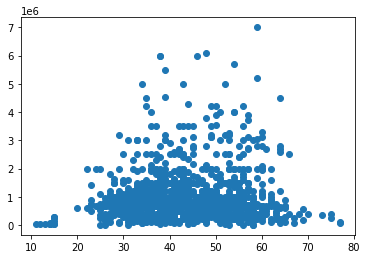

In [ ]:
plt.scatter(Base['edad'],Base['vr_salario'])

In [ ]:
print('Correlación Pearson: ', Base['vr_salario'].corr(Base['edad'], method='pearson'))

Correlación Pearson:  0.0991034280468331


In [ ]:
pip install pingouin

     |████████████████████████████████| 206 kB 7.3 MB/s 
     |████████████████████████████████| 28.5 MB 48 kB/s 
     |████████████████████████████████| 9.8 MB 45.7 MB/s 
  Created wheel for pingouin: filename=pingouin-0.4.0-py3-none-any.whl size=206904 sha256=a3380d20a5ca5164b9f7e0b8bc8f3532aea50832faa5d79b671cd41895aa514e
  Stored in directory: /root/.cache/pip/wheels/8a/9d/c4/11677c2c4d5c0df9d1d4aa61528d868bb96e13b898e3f51c95
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=9c6ff2faa4e6868779076b925cf2d719d8a1f3d9d7febfa7965dc80400abb905
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmo

In [ ]:
import pingouin as pg

In [ ]:
display(pg.corr(Base['vr_salario'], Base['horas_normal'], method='pearson')) #NO TIENEN UNA CORRELACION LINEAL

,n,r,CI95%,p-val,BF10,power
pearson,1283,0.076248,"[0.02, 0.13]",0.006287,1.456,0.780605


In [ ]:
display(pg.corr(Base['vr_salario'], Base['edad'], method='pearson')) #NO TIENEN UNA CORRELACION LINEAL

,n,r,CI95%,p-val,BF10,power
pearson,1283,0.099103,"[0.04, 0.15]",0.000378,19.279,0.945048


In [ ]:
Base_total

,edad,sexo,estado_civil,Total_hijos,tipo_contrato,afiliacion,n_empleados,vr_salario
7,30.0,2.0,1,2,1,1,6,1026000
9,31.0,1.0,1,0,2,1,6,750000
17,32.0,1.0,2,0,2,1,6,689000
18,37.0,1.0,2,0,3,1,2,1500000
25,59.0,1.0,2,0,3,1,2,700000
...,...,...,...,...,...,...,...,...
10808,41.0,1.0,2,0,1,1,6,1600000
10822,33.0,1.0,1,0,1,1,5,760000
10823,35.0,2.0,1,2,1,1,5,1600000
10846,38.0,1.0,1,0,4,1,3,1300000


Una vez filtrada realice un análisis exploratorio corto de la información.

- Se estudiaran 2.425 individuos.


In [ ]:
Base_total.describe()

,edad,sexo,estado_civil,Total_hijos,tipo_contrato,afiliacion,n_empleados,vr_salario
count,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1.283000e+03
mean,42.874513,1.504287,2.070928,0.887763,2.320343,1.013250,3.983632,9.983980e+05
std,10.506546,0.500177,1.199501,1.400311,1.084330,0.182663,2.016441,8.659198e+05
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+03
25%,35.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,5.500000e+05
50%,42.000000,2.000000,2.000000,0.000000,2.000000,1.000000,5.000000,7.300000e+05
75%,51.000000,2.000000,3.000000,2.000000,3.000000,1.000000,6.000000,1.155000e+06
max,77.000000,2.000000,5.000000,8.000000,4.000000,2.000000,6.000000,7.000000e+06


EDAD
- Se puede decir que la edad promedio de los individuos estudiados es de aproximadamente 43 años.
- La edad minima y maxima esta representada por 11 y 44 años respectivamente.
- La mitad de los individuos tienen una edad inferior o igual a 42 años.

SALARIO
- Se puede decir que el salario promedio de los individuos estudiados es de aproximadamente 1.025.963 pesos. Esta encima del salario minimo $ 689.455 para el año 2016.
- El salario minimo y maximo corresponden a 5000 pesos y 11.000.000 pesos respectivamente.
- La mitad de individuos tienen un salario aproximadamente de 750.000 pesos.
- La variabilidad de los datos se ve representada por 

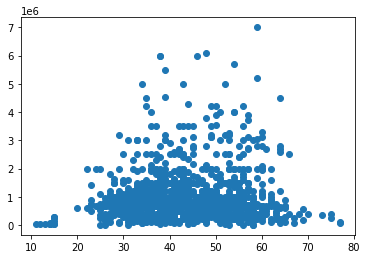

In [ ]:
plt.scatter(Base['edad'], Base['vr_salario'])
plt.show()

Se puede decir que la edad no es una variable que sea altamente influyente en el salario.

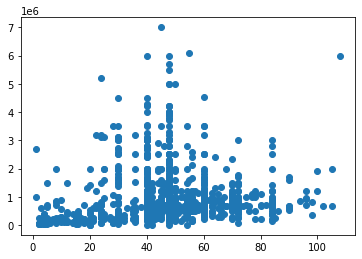

In [ ]:
plt.scatter(Base['horas_normal'], Base['vr_salario'])
plt.show()

In [ ]:
estado_civil1 = Base_total.loc[:, 'estado_civil'] == 1
df_est1 = Base_total.loc[estado_civil1]
df_est1['vr_salario'].mean()

917252.3654223968

In [ ]:
estado_civil2 = Base_total.loc[:, 'estado_civil'] == 2
df_est2 = Base_total.loc[estado_civil2]
df_est2['vr_salario'].mean()

1334365.4507042253

In [ ]:
estado_civil3 = Base_total.loc[:, 'estado_civil'] == 3
df_est3 = Base_total.loc[estado_civil3]
df_est3['vr_salario'].mean()

681765.5172413794

In [ ]:
estado_civil4 = Base_total.loc[:, 'estado_civil'] == 4
df_est4 = Base_total.loc[estado_civil4]
df_est4['vr_salario'].mean()

793770.8333333334

In [ ]:
estado_civil5 = Base_total.loc[:, 'estado_civil'] == 5
df_est5 = Base_total.loc[estado_civil5]
df_est5['vr_salario'].mean()

767947.8260869565

In [ ]:
ul= list(df_est1['vr_salario'])
cas = list(df_est2['vr_salario'])
sep = list(df_est3['vr_salario'])
viud = list(df_est4['vr_salario'])
sol = list(df_est5['vr_salario'])

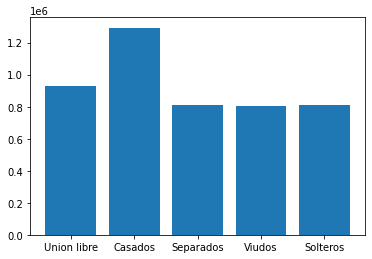

In [ ]:
x= [930306,1293132,809697,807223,807557]
cc = ['Union libre','Casados','Separados','Viudos', 'Solteros']
plt.bar(cc, x)
plt.show()

De acuerdo al grafico anterior se puede decir que en promedio el salario que obtienen los individuos que estan separados, viudos o solteros no tienen cambios significativos. Sin embargo, aquellas personas que estan casadas tienden a tener en promedio un salario mas elevado. 

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
#enter data for three groups
ul= list(df_est1['vr_salario'])
cas = list(df_est2['vr_salario'])
sep = list(df_est3['vr_salario'])
viud = list(df_est4['vr_salario'])
sol = list(df_est5['vr_salario'])


#perform one-way ANOVA
f_oneway(ul, cas, sep , viud , sol)

F_onewayResult(statistic=21.663646074975322, pvalue=4.281768977076886e-17)

In [ ]:
len(ul)

396

In [ ]:
len(cas)

284

In [ ]:
len(sep)

145

In [ ]:
len(viud)

24

In [ ]:
len(sol)

69

In [ ]:
total = ul + cas + sep + viud + sol

Hay almenos una media que es diferente.

In [ ]:
import pandas as pd
import scipy.stats as stats

In [ ]:
from scipy.stats import ttest_ind
ttest_ind(ul, cas)


Ttest_indResult(statistic=-6.850117007253146, pvalue=1.6577711893385024e-11)

La media de los salarios de las personas que tienen como estado civil 'Union libre' es estadisticamente diferente a los individuos que tienen como estado civil 'Casados'

In [ ]:
ttest_ind(cas,viud)

Ttest_indResult(statistic=2.4018763061405357, pvalue=0.01690715836169868)

La media de los salarios de las personas que tienen como estado civil 'Viudos' es estadisticamente diferente a los individuos que tienen como estado civil 'Casados'

In [ ]:
ttest_ind(sep,viud)

Ttest_indResult(statistic=-0.8371390844460906, pvalue=0.40371077187083615)

In [ ]:
ttest_ind(viud,sol)

Ttest_indResult(statistic=0.15318885250096217, pvalue=0.8785885273516865)

En cambio, la media de los salarios de las personas que tienen como estado civil 'Separados' no es significativamente diferente a la media de los salarios de los invidiuos que estan viudos y que estan solteros.

In [ ]:
from statsmodels.stats.multicomp import MultiComparison


In [ ]:
#PRUEBA TUKEY (ESTA ES LA MEJOR OPCION PERO NO PUDE HACERLO)
import pandas as pd
df = pd.DataFrame({'salario': [ul,cas,sep,viud,sol],'group': np.repeat(['ul', 'cas', 'sep', 'viud', 'sol'], repeats=(918,857,388,56,206))}) 

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df['salario'],
                          groups=df['group'],
                          alpha=0.05)

#display results
print(tukey)

ValueError: ignored

In [ ]:
import numpy as np
from scipy import stats
from scipy.stats import expon
import matplotlib.pyplot as plt

In [ ]:
#  Parece que sigue una distribucion exponencial
fig, axes = plt.subplots(1,1)
x = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), 100)
plt.plot(x, expon.pdf(x))
plt.title('Distribución Exponencial')
plt.ylabel('f(x)')
plt.xlabel('X')
plt.hist(Base['vr_salario'])
plt.show()

In [ ]:
# Calculando la simetria con scipy
stats.skew(Base['vr_salario'])

Para el caso del salario podemos ver que la distribución  tiene una asimetria positiva. Lo que indica que el salario tiende hacia valores menores que la media. 

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt # importando matplotlib
import seaborn as sns

In [ ]:
plt.hist(Base['horas_normal']) #parece que sigue una distribucion normal


In [ ]:
# Calculando la simetria con scipy
stats.skew(Base['horas_normal']) #PRESENTA UN POCO DE ASIMETRIA NEGATIVA. 

In [ ]:
plt.hist(Base['edad'])

In [ ]:
datos_graf = [Base['vr_salario'],Base['edad'],Base['horas_normal']]

In [ ]:
# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(datos_graf)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

In [ ]:
import matplotlib.pyplot as plt 

x=[Base['vr_salario']]

plt.boxplot(x)
plt.title("Boxplot Salario")
plt.show()

In [ ]:
import matplotlib.pyplot as plt 

x=[Base['edad']]

plt.boxplot(x)
plt.title("Boxplot Edad")
plt.show()

In [ ]:
#NUMERO DE EMPLEADOS
n_empleados = Base_total.loc[:, 'n_empleados'] == 1
df_emp = Base_total.loc[n_empleados]
df_emp['vr_salario'].mean()


In [ ]:
n_empleados = Base_total.loc[:, 'n_empleados'] == 2
df_emp = Base_total.loc[n_empleados]
df_emp['vr_salario'].mean()

In [ ]:
n_empleados = Base_total.loc[:, 'n_empleados'] == 3
df_emp = Base_total.loc[n_empleados]
df_emp['vr_salario'].mean()

In [ ]:
n_empleados = Base_total.loc[:, 'n_empleados'] == 4
df_emp = Base_total.loc[n_empleados]
df_emp['vr_salario'].mean()

In [ ]:
n_empleados = Base_total.loc[:, 'n_empleados'] == 5
df_emp = Base_total.loc[n_empleados]
df_emp['vr_salario'].mean()

In [ ]:
n_empleados = Base_total.loc[:, 'n_empleados'] == 6
df_emp = Base_total.loc[n_empleados]
df_emp['vr_salario'].mean()

In [ ]:
x= [448760,660794,930959,1003597,1212192,1361552]
cc = ['Trabaja solo','De 2-5','De 6-10','De 11-19', 'De 20-49','50 y más']
plt.bar(cc, x)
plt.show()

Se puede evidenciar que el numero de empleados influye y podria llegar a explicar la variable salario. Entre mas empleados tiene la empresa, mayor es el salario.

In [181]:
#TIPO DE CONTRATO 
tip_con = Base_total.loc[:, 'tipo_contrato'] == 1
df_tip = Base_total.loc[tip_con]
df_tip['vr_salario'].mean()

1050708.5753424657

In [182]:
tip_con = Base_total.loc[:, 'tipo_contrato'] == 2
df_tip = Base_total.loc[tip_con]
df_tip['vr_salario'].mean()

1417548.2857142857

In [183]:
tip_con = Base_total.loc[:, 'tipo_contrato'] == 3
df_tip = Base_total.loc[tip_con]
df_tip['vr_salario'].mean()

566104.6012269938

In [184]:
tip_con = Base_total.loc[:, 'tipo_contrato'] == 4
df_tip = Base_total.loc[tip_con]
df_tip['vr_salario'].mean()

446102.4734982332

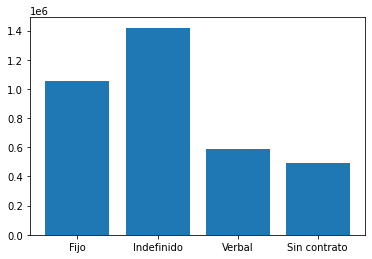

In [186]:
x= [1054393,1419405,586117,492875]
cc = ['Fijo','Indefinido','Verbal','Sin contrato']
plt.bar(cc, x)
plt.show()

Se puede evidenciar que la variable tipo de contrato si influye en la variable salario ya que, aquellos individuos que cuentan con un contrato escrito tienen un mayor salario en promedio mientras que aquellos que tienen contrato verbal o que no tienen contrato ganan mucho menos.
Aquellas personas que tienen un contrato a termino indefinido ganan mas que aquellas que tienen uno a termino fijo.

In [ ]:
#HIJOS
hij = Base_total.loc[:, 'Total_hijos'] == 0
df_hij = Base_total.loc[hij]
df_hij['vr_salario'].mean()

In [ ]:
hij = Base_total.loc[:, 'Total_hijos'] == 1
df_hij = Base_total.loc[hij]
df_hij['vr_salario'].mean()

In [ ]:
hij = Base_total.loc[:, 'Total_hijos'] == 2
df_hij = Base_total.loc[hij]
df_hij['vr_salario'].mean()

In [ ]:
hij = Base_total.loc[:, 'Total_hijos'] == 3
df_hij = Base_total.loc[hij]
df_hij['vr_salario'].mean()

In [ ]:
hij = Base_total.loc[:, 'Total_hijos'] == 4
df_hij = Base_total.loc[hij]
df_hij['vr_salario'].mean()

In [ ]:
hij = Base_total.loc[:, 'Total_hijos'] == 5
df_hij = Base_total.loc[hij]
df_hij['vr_salario'].mean()

In [ ]:
hij = Base_total.loc[:, 'Total_hijos'] == 6
df_hij = Base_total.loc[hij]
df_hij['vr_salario'].mean()

In [ ]:
x= [1129325,981107,929555,706229,630957,480500,412538]
cc = ['0','1','2','3','4', '5', '6']
plt.bar(cc, x)
plt.show()

In [ ]:
#afiliacion
af = Base.loc[:, 'afiliacion'] == 1
df_af = Base.loc[af]
df_af['vr_salario'].mean()

In [ ]:
af = Base.loc[:, 'afiliacion'] == 2
df_af = Base.loc[af]
df_af['vr_salario'].mean()

In [ ]:
x= [1044395,600228]
cc = ['si','no']
plt.bar(cc, x)
plt.show()

Se puede evidenciar que la variable 'Numero total de hijos' influye en la variable salario. Existe una relacion inversamente proporcional, es decir, entre menos hijos mayor sera el salario.

In [ ]:
import matplotlib.pyplot as plt 

x=[Base['horas_normal']]

plt.boxplot(x)
plt.title("Boxplot horas")
plt.show()

In [ ]:
masculino = Base_total.loc[:, 'sexo'] == 1
sum(masculino)

In [ ]:
femenino = Base_total.loc[:, 'sexo'] == 2
sum(femenino)

In [ ]:
1206 + 1219

Observamos que para el caso de la variable sexo son mas las mujeres que los hombres. Tenemos un total de 1219 mujeres y 1206 hombres. 

In [ ]:
df_masculino = Base_total.loc[masculino]
df_masculino

In [ ]:
estado_hombres = df_masculino.loc[:, 'estado_civil'] == 1 #UNION LIBRE
sum(estado_hombres)

In [ ]:
estado_hombres = df_masculino.loc[:, 'estado_civil'] == 2 #CASADOS
sum(estado_hombres)

In [ ]:
estado_hombres = df_masculino.loc[:, 'estado_civil'] == 3 #SEPARADOS O DIVORCIADOS
sum(estado_hombres)

In [ ]:
estado_hombres = df_masculino.loc[:, 'estado_civil'] == 4 #VIUDO
sum(estado_hombres)

In [ ]:
estado_hombres = df_masculino.loc[:, 'estado_civil'] == 5 #SOLTERO
sum(estado_hombres)

In [ ]:
60+8+74+531+533

In [ ]:
(533/1206)*100 #UNION LIBRE

In [ ]:
(531/1206)*100 #CASADOS

In [ ]:
(74/1206)*100 #SEPARADOS O DIVORCIADOS

In [ ]:
(8/1206)*100 #VIUDOS

In [ ]:
(60/1206)*100 #SOLTEROS

In [ ]:
44.02985074626866+44.19568822553897

In [ ]:
df_femenino = Base_total.loc[femenino]
df_femenino

In [ ]:
estado_mujeres = df_femenino.loc[:, 'estado_civil'] == 1 #UNION LIBRE
sum(estado_mujeres)

In [ ]:
estado_mujeres = df_femenino.loc[:, 'estado_civil'] == 2 #CASADAS
sum(estado_mujeres)

In [ ]:
estado_mujeres = df_femenino.loc[:, 'estado_civil'] == 3 #SEPARADAS O DIVORCIADAS
sum(estado_mujeres)

In [ ]:
estado_mujeres = df_femenino.loc[:, 'estado_civil'] == 4 #VIUDAS
sum(estado_mujeres)

In [ ]:
estado_mujeres = df_femenino.loc[:, 'estado_civil'] == 5 #SOLTERAS
sum(estado_mujeres)

In [ ]:
146+48+314+326+385

In [ ]:
(385/1219)*100 #UNION LIBRE

In [ ]:
(326/1219)*100 #CASADAS

In [ ]:
(314/1219)*100 #SEPARADAS O DIVORCIADAS

In [ ]:
(48/1219)*100 #VIUDAS

In [ ]:
(146/1219)*100 #SOLTERAS

In [ ]:
26.743232157506153+31.58326497128794

Observamos que para el caso de la variable estado civil son más las mujeres solteras con un 11.97% con respecto a los hombres con un 4.92% y se da una mayor porcentaje de hombres casados o en union libre con un 88.22% mucho mayor que para el caso de las mujeres que fue del 58.32%. 
Asi mismo, el porcentaje de hombres divorciados o separados fue del 6,13% mientras que el de las mujeres fue del 25.75%, mas del doble.

In [ ]:
import statistics as st

In [ ]:
statistics.mean(Base['vr_salario'])

In [ ]:
 df_masculino['vr_salario'].mean()

In [ ]:
 df_femenino['vr_salario'].mean()

In [ ]:
1165649-887765

Se puede evidenciar que los hombres tienen un salario en promedio de 1.165.649 pesos mientras que las mujeres tienen un salario promedio de 887.765 pesos. Es decir las mujeres ganan 277.884 pesos menos que los hombres en promedio.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
cc = ['HOMBRES', 'MUJERES']
data = [1165649.8383084578,887765.7506152584]
plt.bar(cc,data)
plt.title('GRAFICO SALARIO PROMEDIO POR SEXO')
plt.xlabel('SEXO')
plt.ylabel('SALARIO PROMEDIO')
plt.show()

In [ ]:
 df_masculino['vr_salario'].min()

In [ ]:
df_masculino['vr_salario'].max()

In [ ]:
df_femenino['vr_salario'].min()

In [ ]:
df_femenino['vr_salario'].max()

El salario minimo presentado por el sexo masculino y femenino fue de 5000 pesos. El salario maximo presentado por el sexo masculino fue de 11.000.000 pesos mientras que para el sexo femenino fue de 9.000.000 pesos.

In [ ]:
df_femenino['vr_salario'].median()

In [ ]:
df_masculino['vr_salario'].median()

El 50% de las mujeres tienen un salario menor o igual a 690.000 pesos. En cambio, el 50% de los hombres tienen un salario menor o igual a 890.000 pesos.

In [ ]:
np.std(df_femenino['vr_salario'])

In [ ]:
np.std(df_masculino['vr_salario'])

Los salarios de los hombres se encuentran mas dispersos que los de las mujeres. Es decir, existe mayor diferencia entre los valores de los salarios de un inviduo a otro.

## Punto 4

In [ ]:
Base_total

,edad,sexo,estado_civil,Total_hijos,tipo_contrato,afiliacion,n_empleados,vr_salario
7,30.0,2.0,1,2,1,1,6,1026000
9,31.0,1.0,1,0,2,1,6,750000
17,32.0,1.0,2,0,2,1,6,689000
18,37.0,1.0,2,0,3,1,2,1500000
25,59.0,1.0,2,0,3,1,2,700000
...,...,...,...,...,...,...,...,...
10808,41.0,1.0,2,0,1,1,6,1600000
10822,33.0,1.0,1,0,1,1,5,760000
10823,35.0,2.0,1,2,1,1,5,1600000
10846,38.0,1.0,1,0,4,1,3,1300000


In [ ]:
import pandas as pd

In [ ]:
Base_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1283 entries, 7 to 10871
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   edad           1283 non-null   float64
 1   sexo           1283 non-null   float64
 2   estado_civil   1283 non-null   int64  
 3   Total_hijos    1283 non-null   int64  
 4   tipo_contrato  1283 non-null   int64  
 5   afiliacion     1283 non-null   int64  
 6   n_empleados    1283 non-null   int64  
 7   vr_salario     1283 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 90.2 KB


In [ ]:
Base_total["Total_hijos"] ; Base_total["n_empleados"]

7        6
9        6
17       6
18       2
25       2
        ..
10808    6
10822    5
10823    5
10846    3
10871    2
Name: n_empleados, Length: 1283, dtype: int64

In [53]:
est_dummy = pd.get_dummies(Base_total['estado_civil'], prefix = 'estado_civil')
# hijos_dummy = pd.get_dummies(Base_total['Total_hijos'], prefix = 'total_hijos')
sexo_dummy = pd.get_dummies(Base_total['sexo'], prefix = 'sexo')
contrato_dummy = pd.get_dummies(Base_total['tipo_contrato'], prefix = 'tipo_contrato')
# empleados_dummy = pd.get_dummies(Base_total['n_empleados'], prefix = 'n_empleados')
afiliacion_dummy = pd.get_dummies(Base_total['afiliacion'], prefix = 'afiliacion')

In [54]:
Base_total = pd.concat([Base_total, est_dummy], axis = 1)
#Base_total = pd.concat([Base_total, hijos_dummy], axis = 1)
Base_total = pd.concat([Base_total, sexo_dummy], axis = 1)
Base_total = pd.concat([Base_total, contrato_dummy], axis = 1)
#Base_total = pd.concat([Base_total, empleados_dummy], axis = 1)
Base_total = pd.concat([Base_total, afiliacion_dummy], axis = 1)

In [55]:
Base_total

,edad,sexo,estado_civil,Total_hijos,tipo_contrato,afiliacion,n_empleados,vr_salario,estado_civil_1,estado_civil_2,estado_civil_3,estado_civil_4,estado_civil_5,sexo_1.0,sexo_2.0,tipo_contrato_0,tipo_contrato_1,tipo_contrato_2,tipo_contrato_3,tipo_contrato_4,afiliacion_0,afiliacion_1,afiliacion_2
7,30.0,2.0,1,2,1,1,6,1026000,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
9,31.0,1.0,1,0,2,1,6,750000,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
17,32.0,1.0,2,0,2,1,6,689000,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
18,37.0,1.0,2,0,3,1,2,1500000,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
25,59.0,1.0,2,0,3,1,2,700000,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10808,41.0,1.0,2,0,1,1,6,1600000,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
10822,33.0,1.0,1,0,1,1,5,760000,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
10823,35.0,2.0,1,2,1,1,5,1600000,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
10846,38.0,1.0,1,0,4,1,3,1300000,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [56]:
Base_total_dummies = Base_total.drop(['sexo','estado_civil','tipo_contrato','afiliacion'], axis = 1)

In [57]:
 Base_total_dummies

,edad,Total_hijos,n_empleados,vr_salario,estado_civil_1,estado_civil_2,estado_civil_3,estado_civil_4,estado_civil_5,sexo_1.0,sexo_2.0,tipo_contrato_0,tipo_contrato_1,tipo_contrato_2,tipo_contrato_3,tipo_contrato_4,afiliacion_0,afiliacion_1,afiliacion_2
7,30.0,2,6,1026000,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
9,31.0,0,6,750000,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
17,32.0,0,6,689000,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
18,37.0,0,2,1500000,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
25,59.0,0,2,700000,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10808,41.0,0,6,1600000,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
10822,33.0,0,5,760000,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
10823,35.0,2,5,1600000,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
10846,38.0,0,3,1300000,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [58]:
Base_total_dummies.isna().sum()

edad               0
Total_hijos        0
n_empleados        0
vr_salario         0
estado_civil_1     0
estado_civil_2     0
estado_civil_3     0
estado_civil_4     0
estado_civil_5     0
sexo_1.0           0
sexo_2.0           0
tipo_contrato_0    0
tipo_contrato_1    0
tipo_contrato_2    0
tipo_contrato_3    0
tipo_contrato_4    0
afiliacion_0       0
afiliacion_1       0
afiliacion_2       0
dtype: int64

In [59]:
#APLICACION LOGARITMO
import pandas as pd
Base_total_dummies['vr_salario'] = pd.DataFrame(np.log(Base_total_dummies['vr_salario']))

## Punto 5

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [199]:
Data = Base_total_dummies ; Data.head()

,edad,Total_hijos,n_empleados,vr_salario,estado_civil_1,estado_civil_2,estado_civil_3,estado_civil_4,estado_civil_5,sexo_1.0,sexo_2.0,tipo_contrato_0,tipo_contrato_1,tipo_contrato_2,tipo_contrato_3,tipo_contrato_4,afiliacion_0,afiliacion_1,afiliacion_2
7,30.0,2,6,13.841178,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
9,31.0,0,6,13.527828,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
17,32.0,0,6,13.442997,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
18,37.0,0,2,14.220976,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
25,59.0,0,2,13.458836,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0


In [228]:
Datos_90, Datos_10 = train_test_split(Data,test_size = .1, random_state = 105)

In [229]:
Datos_90.shape , Datos_10.shape , Data.shape

((1154, 19), (129, 19), (1283, 19))

## Punto 6

In [230]:
Datos_90.columns

Index(['edad', 'Total_hijos', 'n_empleados', 'vr_salario', 'estado_civil_1',
       'estado_civil_2', 'estado_civil_3', 'estado_civil_4', 'estado_civil_5',
       'sexo_1.0', 'sexo_2.0', 'tipo_contrato_0', 'tipo_contrato_1',
       'tipo_contrato_2', 'tipo_contrato_3', 'tipo_contrato_4', 'afiliacion_0',
       'afiliacion_1', 'afiliacion_2'],
      dtype='object')

In [231]:
salario = Datos_90["vr_salario"] ; salario.head()

6380    11.695247
3580    13.384728
3878    14.508658
8320    13.997832
7898    11.918391
Name: vr_salario, dtype: float64

In [233]:
Explicativas = Datos_90
del Datos_90["vr_salario"]

KeyError: ignored

In [234]:
Explicativas = Explicativas.drop(['estado_civil_1', 'sexo_1.0', 'tipo_contrato_0','afiliacion_0','tipo_contrato_1','afiliacion_1'], axis = 1)

In [235]:
Explicativas.columns

Index(['edad', 'Total_hijos', 'n_empleados', 'estado_civil_2',
       'estado_civil_3', 'estado_civil_4', 'estado_civil_5', 'sexo_2.0',
       'tipo_contrato_2', 'tipo_contrato_3', 'tipo_contrato_4',
       'afiliacion_2'],
      dtype='object')

In [236]:
X_train, X_test, y_train, y_test = train_test_split(Explicativas, salario, test_size = .25, random_state = 45)

In [237]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((865, 12), (289, 12), (865,), (289,))

## Punto 7

In [238]:
regresion = LinearRegression(fit_intercept=True) 

In [239]:
regresion.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [240]:
y_pred_train = regresion.predict(X_train)

In [241]:

y_pred_test = regresion.predict(X_test)


In [242]:
def metricas(y_real, y_estimado):
  print(f"Error Cuadratico Medio: {mean_squared_error(y_real, y_estimado)}")
  print(f"Error Absoluto Medio: {mean_absolute_error(y_real, y_estimado)}")
  print(f"Raíz del error cuadrático medio: {np.sqrt(mean_squared_error(y_real, y_estimado))}")


In [243]:
print("Métricas del entrenamiento", end = "\n")
print("---"*10)
metricas(y_train,y_pred_train)
print("---"*10)
print("Métricas del Testeo", end = "\n")
print("---"*10)
metricas(y_test,y_pred_test)

Métricas del entrenamiento
------------------------------
Error Cuadratico Medio: 0.47669836587331554
Error Absoluto Medio: 0.47678438205490964
Raíz del error cuadrático medio: 0.6904334623070608
------------------------------
Métricas del Testeo
------------------------------
Error Cuadratico Medio: 0.4543803789018619
Error Absoluto Medio: 0.4795135054779201
Raíz del error cuadrático medio: 0.674077427972382


## Punto 8

In [244]:
from sklearn.linear_model import Ridge

In [245]:
Modelo = Ridge(alpha= 0.1)

In [246]:
Modelo.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [250]:
alpha_p = [0,0.6, 1, 5, 9, 12, 16, 20, 30,100]
for i in alpha_p:
  Modelo = Ridge(alpha = i)
  Modelo.fit(X_train,y_train)
  y_pred_train = Modelo.predict(X_train)
  y_pred_test = Modelo.predict(X_test)
  print("---"*10)
  print(f"Alpha={i}")
  print("Métricas del entrenamiento", end = "\n")
  print("---"*10)
  metricas(y_train,y_pred_train)
  print("---"*10)
  print("Métricas del Testeo", end = "\n")
  print("---"*10)
  metricas(y_test,y_pred_test)





------------------------------
Alpha=0
Métricas del entrenamiento
------------------------------
Error Cuadratico Medio: 0.4766983658733156
Error Absoluto Medio: 0.4767843820549096
Raíz del error cuadrático medio: 0.6904334623070608
------------------------------
Métricas del Testeo
------------------------------
Error Cuadratico Medio: 0.4543803789018629
Error Absoluto Medio: 0.479513505477921
Raíz del error cuadrático medio: 0.6740774279723828
------------------------------
Alpha=0.6
Métricas del entrenamiento
------------------------------
Error Cuadratico Medio: 0.4767057421821013
Error Absoluto Medio: 0.4767041136499537
Raíz del error cuadrático medio: 0.6904388040819412
------------------------------
Métricas del Testeo
------------------------------
Error Cuadratico Medio: 0.4539991979505171
Error Absoluto Medio: 0.47916812785893237
Raíz del error cuadrático medio: 0.6737946259436306
------------------------------
Alpha=1
Métricas del entrenamiento
------------------------------

Puesto que, al implementar Ridge al modelo, con el fin de evitar overfitting, usando diferentes valores del parámetro alpha no se encontró una diferencia contundente para optar por implementar esta herramienta, tanto en las métricas de entrenamiento, como en las metricas de testeo; se decidió por implementar al 10% de los datos de reserva el modelo original con alpha = 0.

In [251]:
Datos_10.columns

Index(['edad', 'Total_hijos', 'n_empleados', 'vr_salario', 'estado_civil_1',
       'estado_civil_2', 'estado_civil_3', 'estado_civil_4', 'estado_civil_5',
       'sexo_1.0', 'sexo_2.0', 'tipo_contrato_0', 'tipo_contrato_1',
       'tipo_contrato_2', 'tipo_contrato_3', 'tipo_contrato_4', 'afiliacion_0',
       'afiliacion_1', 'afiliacion_2'],
      dtype='object')

In [252]:
salario10 = Datos_10["vr_salario"] ; salario10.head()

7868     13.429848
9911     13.815511
3513     13.122363
10501    13.415033
5350     13.764217
Name: vr_salario, dtype: float64

In [253]:
Explicativas10 = Datos_10
del Datos_10["vr_salario"]

In [254]:
Explicativas10 = Explicativas10.drop(['estado_civil_1', 'sexo_1.0', 'tipo_contrato_0','afiliacion_0','tipo_contrato_1','afiliacion_1'], axis = 1)

In [255]:
Explicativas10.columns

Index(['edad', 'Total_hijos', 'n_empleados', 'estado_civil_2',
       'estado_civil_3', 'estado_civil_4', 'estado_civil_5', 'sexo_2.0',
       'tipo_contrato_2', 'tipo_contrato_3', 'tipo_contrato_4',
       'afiliacion_2'],
      dtype='object')

In [256]:
y_real = salario10

In [257]:
y_estimado = regresion.predict(Explicativas10)

In [258]:
metricas(y_real,y_estimado)

Error Cuadratico Medio: 0.3891250472590887
Error Absoluto Medio: 0.4610396021352563
Raíz del error cuadrático medio: 0.6237988836629068


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


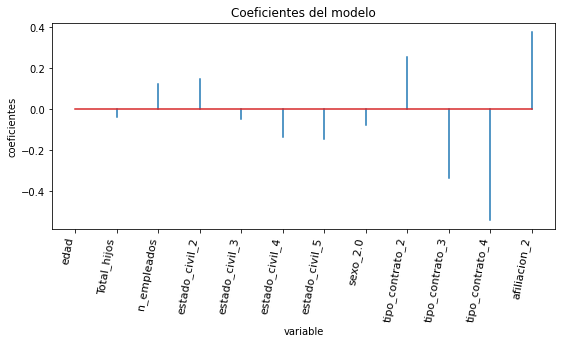

In [259]:
df_coeficientes = pd.DataFrame( {'predictor': X_train.columns,
                         'coef': regresion.coef_.flatten()})

fig, ax = plt.subplots(figsize=(9, 3.8))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=80, ha='right', size=11)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [260]:
regresion.intercept_

13.028182961576707

In [261]:
df_coeficientes 

,predictor,coef
0,edad,0.001368
1,Total_hijos,-0.039264
2,n_empleados,0.122566
3,estado_civil_2,0.150317
4,estado_civil_3,-0.046979
5,estado_civil_4,-0.136672
6,estado_civil_5,-0.144625
7,sexo_2.0,-0.074336
8,tipo_contrato_2,0.253589
9,tipo_contrato_3,-0.332097


## Punto 9

> *Y_log(salario) = 13.028 + 0.00136X_%edad - 0.0392X_%TotalHijos + 0.1225X_%empleados + 0.1503X_%estado2 - 0.0469X_%estado3 - 0.1366X_%estado4 - 0.1446X_%estado5 - 0.0743X_%sexo2 + 0.2535X_%contrato2 - 0.3320X_%contrato3 - 0.5382X_contrato4 + 0.3772X_afiliación2*




















Conforme a las estimaciones obtenidas en el modelo se considera que cuando la cantidad de años o edad de un individuo aumenta en una unidad, se estima que el salario devengado por el mismo aumenta en un 0.136%, manteniendo las demás variables constantes. Asi mismo, cuando el total de hijos de la persona aumenta una unidad, se espera que el salario disminuya en un 3.92%, siempre y cuando las demás variables permanescan constantes. 
Ahora bien, si el enfoque es el numero de empleados que maneja la empresa a la cual pertenece el individuo, y si dicha cantidad de empleados aumenta en una unidad se estima que el salario aumenta en 12.25%, manteniendo las demás variables constantes.

Por otra parte, especificamente el estado civil, estima que cuando la persona o empleado ese encuentra Casado, se espera que el salario aumente en 15.03% en comparación con las personas que se encuentran en Union libre. De forma similar ocurre con los individuos que se encuentran Separados, solo que en este caso el salario disminuye en 4.697%. Para las personas que se encuentran viudas, el salario disminuye un 13.66% en comparación a las personas que mantienen una relación en union libre. Y finalmente Las personas solteras, en comparación a las que estan en estad de union libre, su salario disminuye en 14.46%. Teniendo en cuenta dichas variaciones siempre y cuando las demás variables se mantengan constantes. 

Otro factor influyente 

In [262]:
0.00136*100

0.136

In [264]:
0.15*100

15.0

In [178]:
0.0830*100

8.3